In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
! pwd

/Users/pavanmreddy/Downloads/Data_Science_Project


In [3]:
# ! git clone https://github.com/joshuaaduarte/categorize_ethnicity.git

In [4]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# change the paths with respect to the local computer path for Josh
IMAGE_SIZE = [224,224]
train_path = "/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw"
test_path = "/Users/pavanmreddy/Downloads/categorize_ethnicity/val_raw"

In [6]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Metal device set to: Apple M1 Max


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
folders = glob('/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/*')

In [9]:
folders

['/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Indian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Latino_Hispanic',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/East Asian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Middle Eastern',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/White',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Southeast Asian',
 '/Users/pavanmreddy/Downloads/categorize_ethnicity/train_raw/Black']

In [10]:
len(folders)

7

In [11]:
# giving better results
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [12]:
IMG_SIZE = 224
CHANNELS = 3
NUM_CLASSES = 7
BATCH_SIZE = 32

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   rotation_range=2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 69734 images belonging to 7 classes.


In [17]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 27660 images belonging to 7 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
)

Epoch 1/10


2023-05-05 01:33:23.023892: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


69/69 [==============================] - 15s 206ms/step - loss: 5.1917 - accuracy: 0.1594 - val_loss: 2.2203 - val_accuracy: 0.1429
Epoch 2/10
69/69 [==============================] - 14s 198ms/step - loss: 2.4358 - accuracy: 0.1630 - val_loss: 2.7978 - val_accuracy: 0.1596
Epoch 3/10
69/69 [==============================] - 14s 199ms/step - loss: 2.4639 - accuracy: 0.1762 - val_loss: 2.8779 - val_accuracy: 0.1629
Epoch 4/10
69/69 [==============================] - 14s 199ms/step - loss: 2.6071 - accuracy: 0.1635 - val_loss: 3.0074 - val_accuracy: 0.1719
Epoch 5/10
69/69 [==============================] - 14s 199ms/step - loss: 2.7275 - accuracy: 0.1712 - val_loss: 2.2100 - val_accuracy: 0.1574
Epoch 6/10
69/69 [==============================] - 14s 198ms/step - loss: 2.5437 - accuracy: 0.1793 - val_loss: 2.6639 - val_accuracy: 0.1551
Epoch 7/10
69/69 [==============================] - 14s 200ms/step - loss: 2.3041 - accuracy: 0.1902 - val_loss: 2.3304 - val_accuracy: 0.1775
Epoch 8/10

In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set)// BATCH_SIZE + 1,
  validation_steps=len(test_set)// BATCH_SIZE + 1,
)

Epoch 1/20
69/69 [==============================] - 14s 198ms/step - loss: 2.5555 - accuracy: 0.1807 - val_loss: 1.9851 - val_accuracy: 0.2489
Epoch 2/20
69/69 [==============================] - 14s 198ms/step - loss: 2.3222 - accuracy: 0.2260 - val_loss: 2.7799 - val_accuracy: 0.2366
Epoch 3/20
69/69 [==============================] - 14s 197ms/step - loss: 2.3692 - accuracy: 0.2083 - val_loss: 2.6253 - val_accuracy: 0.2511
Epoch 4/20
69/69 [==============================] - 14s 197ms/step - loss: 2.7669 - accuracy: 0.1861 - val_loss: 3.1206 - val_accuracy: 0.1864
Epoch 5/20
69/69 [==============================] - 14s 197ms/step - loss: 2.6722 - accuracy: 0.1902 - val_loss: 3.0652 - val_accuracy: 0.1920
Epoch 6/20
69/69 [==============================] - 14s 198ms/step - loss: 2.4190 - accuracy: 0.1916 - val_loss: 3.3109 - val_accuracy: 0.1518
Epoch 7/20
69/69 [==============================] - 14s 199ms/step - loss: 2.3093 - accuracy: 0.2011 - val_loss: 2.4675 - val_accuracy: 0.2321

KeyboardInterrupt: 

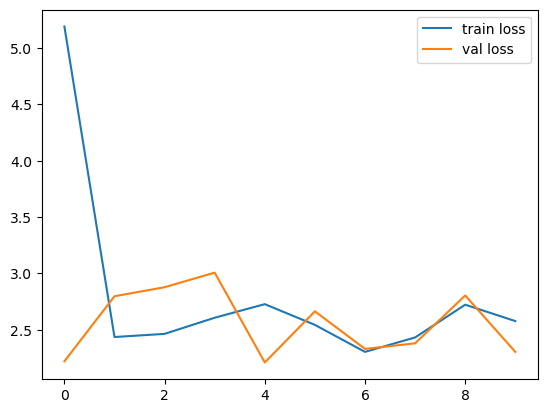

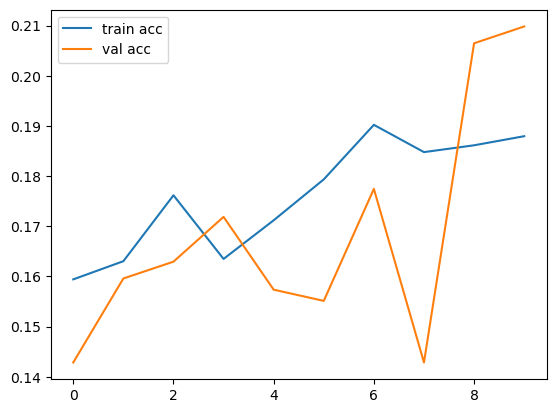

<Figure size 640x480 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

In [ ]:
! mkdir /content/gdrive/MyDrive/DataScience_Project/modelweights

In [ ]:
! cd mkdir /content/gdrive/MyDrive/DataScience_Project/modelweights

In [ ]:
! pwd

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_vggface50raw.h5')